# county-level segregation

## diagnostics for small subunit counties

In [1]:
import pandas as pd
import numpy as np
import sqlite3 as sql
from matplotlib import pyplot
%matplotlib inline

In [2]:
# read diversity scores from db
db = "/home/eric/Documents/franklin/narsc2018/generated_data/narsc18.sqlite"
con = sql.connect(db)
qry = '''
SELECT * 
FROM county_diversity
;
'''
df = pd.read_sql(qry, con, index_col="GISJOIN")
# print df.head()
con.close()

In [3]:
# add county count of block groups
df2 = pd.read_csv("/home/eric/Documents/franklin/narsc2018/generated_data/blck_grp_county.csv", index_col="GISJOIN")
print df2.head()

          block_groups
GISJOIN               
G1700030             9
G4701190            50
G4201150            40
G3700530            11
G2000870            15


In [4]:
# merge county counts to diversity dataframe
merged = pd.merge(df, df2, left_index=True, right_index=True)
print len(merged)

3143


In [5]:
# get describive stats for count of block groups
merged['block_groups'].describe()

count    3143.000000
mean       68.985682
std       211.315401
min         1.000000
25%        10.000000
50%        21.000000
75%        49.000000
max      6417.000000
Name: block_groups, dtype: float64

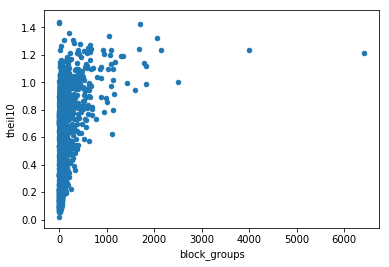

In [6]:
merged.plot.scatter('block_groups', 'theil10')

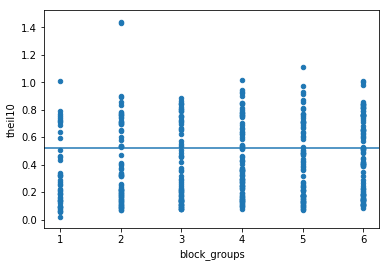

In [13]:
ax=merged.loc[merged['block_groups']<=6].plot.scatter('block_groups', 'theil10')
ax.axhline(y=merged['theil10'].mean())

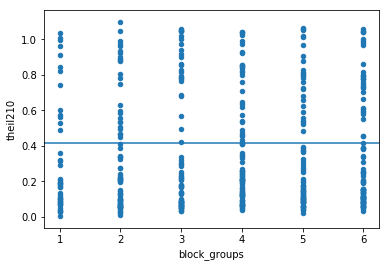

In [14]:
ax=merged.loc[merged['block_groups']<=6].plot.scatter('block_groups', 'theil210')
ax.axhline(y=merged['theil210'].mean())

In [8]:
merged['theil10'].describe()

count    3143.000000
mean        0.518567
std         0.295811
min         0.021240
25%         0.244037
50%         0.488947
75%         0.767286
max         1.441097
Name: theil10, dtype: float64

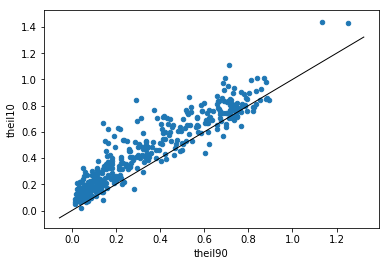

In [10]:
ax=merged.loc[merged['block_groups']<=6].plot.scatter('theil90', 'theil10')
x = np.linspace(*ax.get_xlim())
ax.plot(x, x, color='black', linewidth=1)

Need to follow-up w/ RF on how to how to proceed given these results. RF suggested uniformly low diversity would reduce the necessity of considering small subunit counties for calculating segregation. I guess the logic would be there are fewer people to segregate in places w/ very low diversity.

For now, look into small subunit counties with high diversity. Who are they?

In [29]:
merged['theil10'].mean()

0.5185670430073522

In [36]:
merged['theil210'].mean()

0.4187898770632792

In [48]:
# read diversity scores from db
db = "/home/eric/Documents/franklin/narsc2018/generated_data/narsc18.sqlite"
con = sql.connect(db)
qry = '''
SELECT A.GISJOIN, D.STATE, B.namelsad10, A.theil10, D.CL8AA2010
FROM county_diversity AS A JOIN us_county_2010 AS B 
ON A.GISJOIN = B.GISJOIN
JOIN county_block_group_count AS C ON A.GISJOIN = C.GISJOIN
JOIN nhgis_pop_race_norm_90_10 AS D ON A.GISJOIN = D.GISJOIN
WHERE C.block_groups <= 5
AND A.theil10 > 0.52
;
'''
df = pd.read_sql(qry, con, index_col="GISJOIN")
con.close()

df.groupby('STATE').size()

STATE
Alaska             8
Arkansas           1
California         1
Colorado           4
Georgia           10
Hawaii             1
Idaho              3
Kansas             9
Minnesota          1
Mississippi        1
Nebraska           1
Nevada             5
New Mexico         7
North Carolina     3
Oklahoma           3
South Dakota       9
Texas             50
Virginia           2
Wisconsin          1
dtype: int64

In [47]:
len(df)

120

In [49]:
df['CL8AA2010'].describe()

count      120.000000
mean      3669.808333
std       1963.839710
min         82.000000
25%       2234.750000
50%       3500.000000
75%       4884.250000
max      10170.000000
Name: CL8AA2010, dtype: float64